In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("D:/Revision/movies.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

## Data Cleaning 

In [5]:
# checking for missing values 

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
# dropping rows which has missing values

df.dropna(inplace=True)

In [7]:

df.reset_index(drop=True, inplace=True)

In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [10]:
# drop the duplicates if any

df.drop_duplicates(inplace=True)

In [11]:
# dropping columns which is not required

df.drop('released', axis=1, inplace=True)

#### Budget vs Gross 

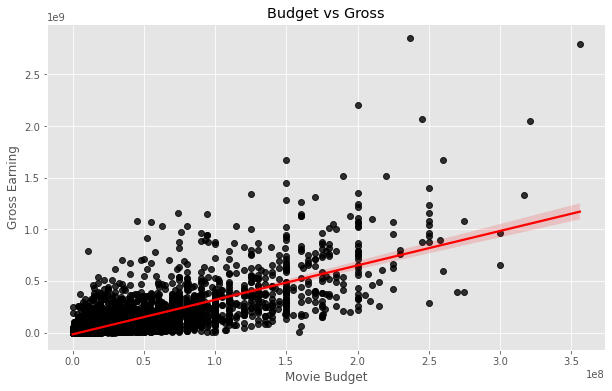

In [13]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='budget', y='gross', scatter_kws={'color' : 'black'}, line_kws={'color' : 'red'})
plt.title('Budget vs Gross')
plt.xlabel('Movie Budget')
plt.ylabel('Gross Earning')
plt.show()

#### Correlation of Numerical Features

Text(69.0, 0.5, 'Movie Features')

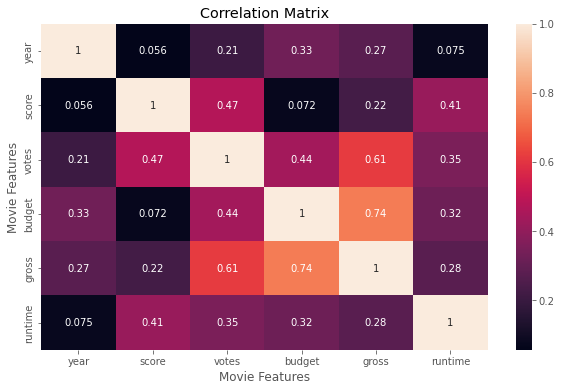

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

#### Correlation of both numerical and Categorical column

In [16]:
df1 = df

for i in df1.columns:
    if df1[i].dtype=='object' :
        df1[i] = df1[i].astype('category')
        df1[i] = df1[i].cat.codes

In [30]:
df1.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0


Text(114.0, 0.5, 'Movie Features')

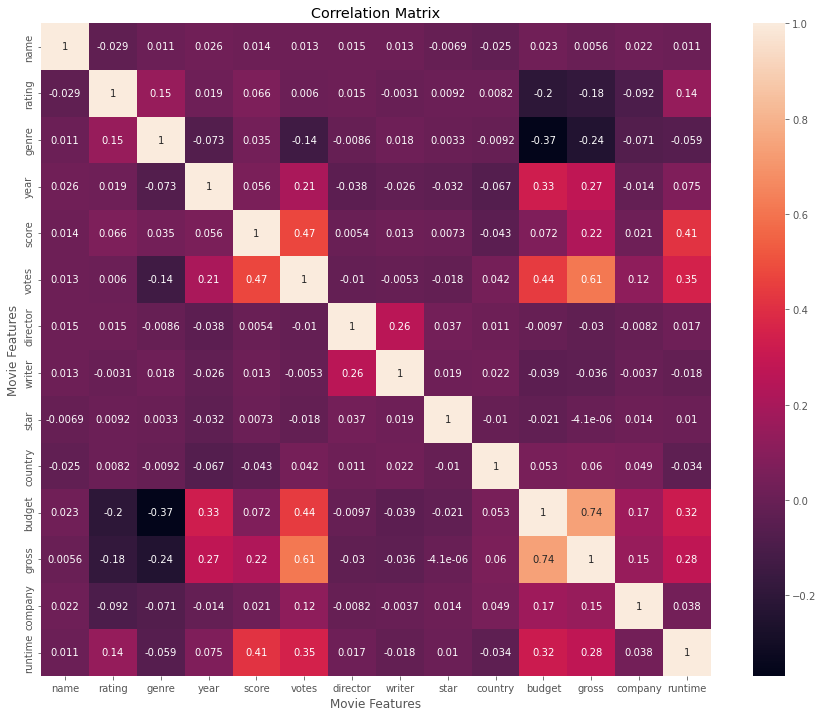

In [17]:
plt.figure(figsize=(15,12))
sns.heatmap(data=df1.corr(), annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [22]:
corr = df1.corr()

corr_pairs = corr.unstack()
sorted_corr = corr_pairs.sort_values()

In [28]:
High_Positive_Correlation = sorted_corr[(sorted_corr)>0.5]
High_Positive_Correlation

gross     votes       0.614751
votes     gross       0.614751
budget    gross       0.740247
gross     budget      0.740247
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [29]:
High_Negative_Correlation = sorted_corr[(sorted_corr)< -0.5]
High_Negative_Correlation

Series([], dtype: float64)